### Práctica de Metaheurísticas

Se buscarán soluciones al problema del viajante de comercio (TSP) para las poblaciones de la Comunidad de Madrid.

Parte obligatoria:
  * Construcción con algoritmo greedy.
  * Búsqueda local, best improvement y first improvement.
  * Iterated Local Search.

Mejoras opcionales:
  * Implementar el operador two_opt.
  * Añadir temple simulado.
  * Búsqueda GRASP.
  * Implementar algún otro problema.

In [2]:
from copy import deepcopy

"""# definición del TSP

import random
N = 10

cities = []

for i in range(N):
	c = [random.random(), random.random()]
	cities.append(c)

#print(cities)

cities = [[0.8744058793117488, 0.30207179832703746], [0.6901572276474558, 0.8203362566663311], [0.7793458478083026, 0.09728979746351918], [0.7483358474304422, 0.4563419482458657], [0.4556164527790729, 0.12863149772605698], [0.1837236688553453, 0.23773749495644914], [0.806151832654163, 0.3288366900529254], [0.6222702185205219, 0.6019431085670109], [0.21886861543988367, 0.6980104036528004], [0.9706096813038716, 0.054871876245520146], [0.13881496219356027, 0.048489530185603646], [0.08511086492841424, 0.9123075505436051], [0.45436952164297595, 0.4731540740573398], [0.8986352255038935, 0.5116579750591849], [0.9539248970461742, 0.7530784036308166], [0.6321102985156373, 0.13575967095580344], [0.31130918313591205, 0.8545457319320597], [0.025897479791937017, 0.7854526665590987], [0.31414095045738066, 0.051421702103483846], [0.2739561013272712, 0.1970964027924862], [0.22762328443470214, 0.627414210742153], [0.44920042912037383, 0.18835427573438068], [0.2793138301174244, 0.9103956650199608], [0.005128451667189338, 0.4655718085045638], [0.9222718335261915, 0.8613103704784812], [0.49352498279326595, 0.28652416807644077], [0.5560886356057152, 0.034564925228364185], [0.0048939219846825255, 0.8635350555457212], [0.7824462381771976, 0.09355415747424733], [0.2973635133076785, 0.037580527218207815], [0.659068210692151, 0.5602321147981546], [0.43549418718677035, 0.6241289474799954], [0.25580657871099755, 0.519726015381631], [0.5950780852425872, 0.3193476592023645], [0.15763623266223903, 0.18210618406479095], [0.3434173147566393, 0.32992255868483356], [0.06451313705472006, 0.12606114349173192], [0.23212286400737547, 0.3945559700824013], [0.955507285594692, 0.02296933408938162], [0.7459955912073274, 0.1385374827130177], [0.46365765315595475, 0.6132297411379687], [0.20196772698059162, 0.046358747430397584], [0.2980093518214506, 0.36041197123227897], [0.7533459401199348, 0.6610562232191091], [0.323433933838161, 0.5068337090138902], [0.062138830138457, 0.7177455044259695], [0.47467832142010535, 0.17692718986260936], [0.2415634321550142, 0.500852093941769], [0.3441878827094532, 0.2604351258948506], [0.5445252142594251, 0.7295590645635646], [0.25391391610860914, 0.7641244059389684], [0.2630560480211699, 0.010670642241309536], [0.2092202940037915, 0.7415775443241935], [0.0031474687633804566, 0.6974574785842637], [0.4952329615559806, 0.9311775894780175], [0.1978488658972426, 0.8872693649066419], [0.1705364411799497, 0.8846808176103278], [0.7634962513234275, 0.4358457309207533], [0.9259752834140167, 0.0056226911773098465], [0.22090405091557253, 0.14500040130773872], [0.4636205151855679, 0.19249574424477278], [0.8057632881682811, 0.250168118157608], [0.6785236695642043, 0.39119477830554505], [0.4837264739606879, 0.23045417711558214], [0.8786721718893166, 0.015853186240832207], [0.1263309724872509, 0.9185321014517236], [0.24969404380600335, 0.9600467657522086], [0.5886119367943214, 0.10948123668473264], [0.13373527735293878, 0.5336853876899833], [0.5642696742735989, 0.9801384844337597], [0.646401605512568, 0.3338636388089157], [0.05603526365085032, 0.3149530712641142], [0.387141492676661, 0.5792852545912592], [0.8634070619751958, 0.8206820685065667], [0.4662474858565825, 0.32647667516764145], [0.01801973379815025, 0.12175434785651695], [0.6218125565554127, 0.07860046445444713], [0.6573938922925594, 0.5023092428939168], [0.2837581848186974, 0.02576704782244421], [0.3044774374252185, 0.7310313422019327], [0.33131673439274434, 0.693896434962478], [0.8523694048117944, 0.2805224723356823], [0.6200019812032047, 0.03989814578273998], [0.5437394088109648, 0.3258031129949792], [0.4386079860370994, 0.6142798815693052], [0.7430581106897977, 0.49260737229959284], [0.3913628378102181, 0.3185830750836698], [0.9065498976196814, 0.02381958527497441], [0.6874236611131453, 0.18642068590773597], [0.6946411585627993, 0.36991609629423117], [0.3784063098306413, 0.01018756575849844], [0.43806374889930155, 0.2268325586117821], [0.7411632641820634, 0.35513151640087337], [0.3884706603234591, 0.34043302784114093], [0.08674110453583683, 0.4491174987265194], [0.9794883193315694, 0.11207520940235804], [0.7496156619797683, 0.23845386610980834], [0.4423888847621813, 0.17212722421686055], [0.2276570035864689, 0.6515924491551327], [0.836939257954547, 0.0499933914625984]] # Length=8.587
"""
def dist (x, y): # distancia euclídea
	return ( (x[0]-y[0])**2 + (x[1]-y[1])**2 ) ** 0.5

def globaldist (cities): # calcula la ditancia global de una solución
	acum = 0.0
	for i in range(len(cities)):
		acum += dist(cities[i-1],cities[i]) # -1 is the last element
	return acum

def nearest (c, l): # get the nearest city to c in l
	res = l[0]
	d = dist(c,l[0])
	for e in l[1:]:
		newd = dist(c,e)
		if newd < d:
			res = e
			d = newd
	return res

In [3]:
# Poblaciones de la Comunidad de Madrid

import matplotlib.pyplot as plt
import numpy as np

from madrid import *

def dist (x, y):
	return ( ( (x[0]-y[0])**2 + (x[1]-y[1])**2 ) ** 0.5 ) * 111.1 # km por grado

def draw (solution):
    minx, maxx = -4.79, -2.82
    miny, maxy = 39.92, 41.16
    margx = 0.05
    margy = 0.1

    plt.ion()
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.set_xlabel('lon')
    axes.set_ylabel('lat')
    xlim = axes.set_xlim(minx, maxx)
    ylim = axes.set_ylim(miny, maxy)
    img = plt.imread("madrid.png")
    plt.imshow(img, extent=[minx-margx,maxx+margx,miny-margy,maxy+margy], aspect='auto')

    bucle = solution + [solution[0]] # añade al final la vuelta a la primera
    c = np.array(bucle)
    x = c[:,1]
    y = c[:,0]

    l1, = axes.plot(x, y,'r')
    pl2, = axes.plot(x, y,'bo',markersize=2)
    
    s = 'Length=%5.3f' % globaldist(bucle)
    
    plt.title(s)


]### Búsquedas constructivas

Búsqueda voraz (greedy)
 * Va añadiendo en cada iteración la ciudad más cercana a la actual
 * Es dependiente del problema

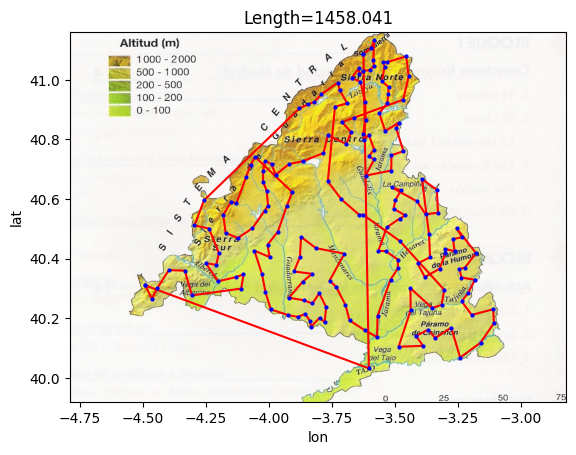

In [4]:
def greedy (cities):
    '''
    Construye una solución "buenecilla" añadiendo en cada paso la ciudad más cercana de entre las que quedan por añadir
    '''
    sol = [cities[0]]
    cities = cities[1:]
    
    while cities:
        next = nearest(sol[-1], cities)
        sol.append(next)
        cities.remove(next)
        
    return sol

res = greedy(cities)
draw(res)

### Búsqueda local

Mientras haya mejoras, explora el entorno de vecindad para ver si encuentra una solución mejor.
 * Puede ser first improvement o best improvement.

In [5]:
def swap (p1, p2, l): # operador swap (intercambia dos ciudades en las posiciones p1 y p2)
    res = l[:] # copy the list
    res[p1], res[p2] = l[p2], l[p1]
    return res

In [6]:
from itertools import combinations

def vecindad (estado, operador):
    combinaciones = combinations(range(len(estado)), 2)
    vecinos = [operador(p1, p2, estado) for p1, p2 in combinaciones]
    return vecinos


def local_search (state, fn, fnh, operador, best_improvement=False):
    '''Búsqueda local
    state: solución de partida (aleatoria o utilizando un método constructivo).
    fn: función de evaluación (a minimizar).
    fnh: función de creación del entorno de vecindad.
    best_improvement: si usa estategia first_improvement o best_improvement
    '''
    
    improvement = True
    solucion_parcial = state
    
    while improvement:
        vecinos = fnh(solucion_parcial, operador)
        
        if best_improvement:
            posible_sol = min(vecinos, key=fn)
            
            if fn(posible_sol) < fn(solucion_parcial):
                solucion_parcial = posible_sol
            else:
                improvement = False
                
        else:
            
            improvement = False
            
            for vecino in vecinos:
                if fn(vecino) < fn(solucion_parcial):
                    solucion_parcial = vecino
                    improvement = True
                    break
            
            
        print(fn(solucion_parcial))
            
    return solucion_parcial

In [7]:
sol1 = local_search(cities, globaldist, vecindad, swap, True)

9843.83730219353
9548.814381658924
9288.84559220327
9034.229342927401
8785.484338852386
8544.08185175017
8305.576038222214
8099.047532835067
7900.941591247428
7712.94444423818
7540.127339228125
7376.802341925025
7217.4703267929735
7062.487376675975
6916.391072837231
6786.283638925577
6662.181160819701
6540.83562871533
6424.296717041773
6308.118189742098
6204.356613961637
6103.651006855157
6004.764299652629
5908.16430445067
5821.1963780132055
5751.9818680916405
5685.0594944188515
5619.44406686053
5557.0222247459815
5496.696207458987
5439.821758246039
5381.0599204902965
5329.051860072778
5277.6177896611725
5226.792569322147
5116.558678609002
5071.550184193528
5029.138984852781
4972.42249246163
4929.184259772869
4889.350123287207
4851.120486165865
4804.11357897563
4747.327186494249
4660.048981486994
4617.90713462462
4579.951428677983
4536.13417356168
4457.31026941358
4420.912804008138
4373.8636438045
4326.578292884049
4249.39310574491
4186.444440141927
4145.876680209448
4109.5021093224495

In [8]:
sol2 = local_search(cities, globaldist, vecindad, swap, False)

10141.378724819051
10107.160368618825
10098.817459269565
10085.605937263697
10039.311025050672
10001.620469483478
9989.239553996093
9967.132673964918
9945.761155627839
9943.478448852959
9902.604514557115
9897.726702765403
9897.723381639182
9874.621823448932
9855.33389626058
9849.716589893273
9841.85393221912
9836.789056118021
9823.38089698513
9791.586534449663
9749.735245816228
9746.41243091823
9745.757316507841
9698.055220135011
9692.089665763451
9690.839881794445
9685.562805998428
9678.668995884314
9640.018324280263
9615.717352227934
9594.291006569672
9588.456351383778
9577.258952101745
9575.39131571339
9565.305795136857
9554.683806933039
9550.198353759344
9549.860662345593
9533.659157082224
9421.448050409412
9363.405405184554
9321.866904462779
9312.561612073285
9308.35214937899
9255.468585537401
9248.879241616827
9232.582620553247
9229.610441739685
9219.696518267578
9190.00615012056
9160.107342196918
9159.638359184404
9151.56964074291
9123.36260330268
9111.668898622347
9109.71949989

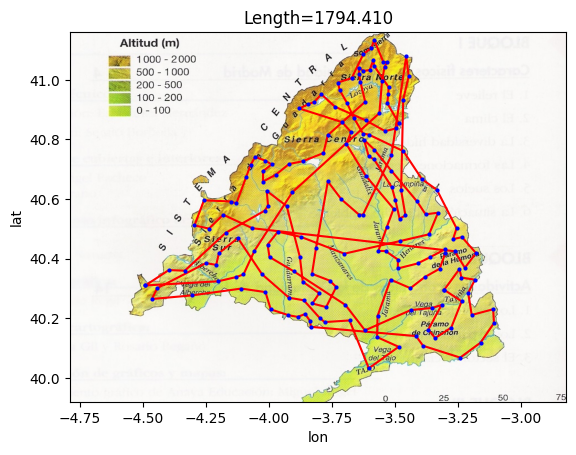

In [9]:
draw(sol2)

10940.78802709924
10635.988293485665
10358.054179142462
10092.328675861663
9861.322682644388
9633.650898869417
9417.581448153314
9203.631442120359
8994.667277896975
8794.684262292205
8595.582394767243
8404.68283182354
8215.16095158062
8026.758227975624
7845.179650390194
7666.969604722911
7492.667619062178
7330.569003973714
7180.934777030999
7033.884237375968
6897.91217185444
6764.827865419446
6633.811611062464
6502.881513992935
6376.362818401477
6259.323555833558
6149.410279032134
6041.850523456829
5935.80395301788
5841.235613709898
5748.740111343157
5657.052863897731
5567.867563835481
5488.387855849302
5421.706166960498
5359.103981230387
5296.797230723195
5234.710353219843
5173.247862178667
5112.34357197188
5057.612254260138
5010.006032399526
4962.808389446792
4917.512060260025
4865.8782196850025
4821.35767978496
4779.710832855023
4738.084086019872
4695.339021653439
4655.8735316288485
4617.970190882165
4582.03183667161
4505.3257515080795
4454.465963043179
4419.227654867559
4385.040224

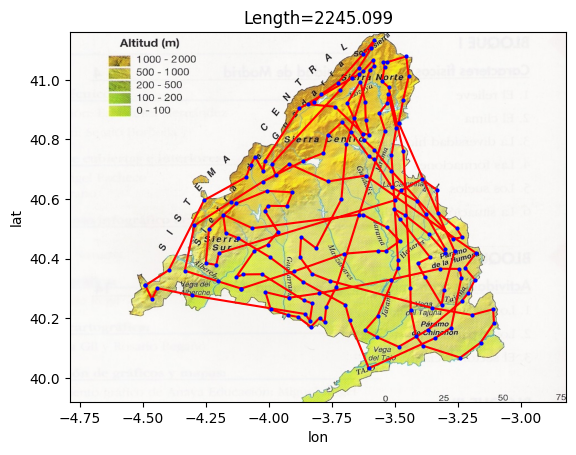

In [10]:
import random
random.shuffle(cities)

sol = local_search(cities, globaldist, vecindad, swap, best_improvement=True)
draw(sol)

La solución encontrada depende del tipo de movimiento que elijamos, y para cada problema puede haber varios, siendo unos mejores que otros.

Para el TSP se recomienda utilizar el operador two-opt, que lo que hace es elegir dos puntos al azar e invertir la cadena entre esos dos puntos.

### Iterated Local Search

Repite la búsqueda local cierto número de veces aplicando una perturbación a la solución anterior encontrada.


In [11]:
from random import choices

def perturbate_tsp (state, N=1): # la perturbación tiene que ser diferente a los movimientos   
    
    state = state[:]
    
    for _ in range(N):
        p1, p2 = choices(range(len(state)), k = 2)
        state = swap(p1, p2, state)
        
    return state
    
def ILS (state, fn, fnh, perturbate, N=1000, NP=20, best_improvement=False):
    for _ in range(N):
        state = perturbate(state, NP)
        
        vecinos = fnh(state, swap)
        
        if best_improvement:
            state = min(vecinos, key=fn)
        else:
            
            for vecino in vecinos:
                if fn(vecino) < fn(state):
                    state = vecino
                    break
        
        
        print(fn(state))
    
    return state


In [12]:
from random import choices

def perturbate_tsp (state, N=1): # la perturbación tiene que ser diferente a los movimientos   
    
    state = state[:]
    
    for _ in range(N):
        p1, p2 = choices(range(len(state)), k = 2)
        state = swap(p1, p2, state)
        
    return state

def ILS (state, fn, fnh, perturbate, N=1000, NP=20, best_improvement=False):
    
    best_sol = state
    for _ in range(N):
        state = perturbate(best_sol, NP)
        
        if best_improvement:
            state = local_search(state, fn, fnh, swap, best_improvement=True)
        else:
            state = local_search(state, fn, fnh, swap, best_improvement=False)
        
        print(f"Longitud total: {fn(state)}")
        
        if fn(best_sol) > fn(state):
            best_sol = state
    
    return best_sol

2509.193766143625
2507.568756387005
2505.433252121077
2495.299406524311
2491.09572852202
2490.554561257408
2456.490752212875
2450.7726364640694
2448.956072410956
2446.8888192497943
2444.496411936774
2444.1379508202617
2432.211397861942
2426.090323868584
2390.0102847550515
2382.2121116634653
2374.366450447571
2374.0932960781984
2357.8385392217515
2291.522245236913
2281.53427655077
2279.1769893647074
2274.4276201933712
2272.7520331386763
2272.298257012721
2267.730233849864
2253.2669436740957
2247.655018458671
2247.1906701566954
2231.2031218211996
2223.604599040654
2203.2983099032945
2193.9479972964996
2188.2260427898004
2187.3700202047416
2185.825978549771
2184.4987452088053
2177.767720135609
2177.465747121216
2176.4794485507878
2175.025222485841
2166.4918449202883
2165.4428090616047
2163.7805722711246
2162.908237080382
2099.1287290790347
2093.914793413918
2093.1792196502092
2051.743677134195
2051.6462878004077
2045.1575774831829
2037.1777657907921
2036.8151333169712
2026.9118376704691
2

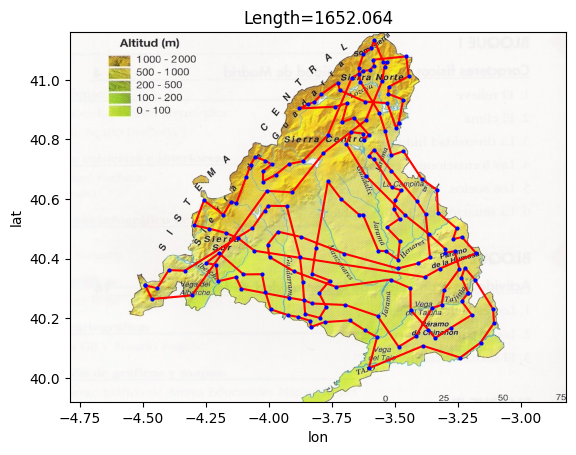

In [13]:
random.shuffle(cities)
sol = ILS(sol2, globaldist, vecindad, perturbate_tsp, NP=int(len(sol2) * 3/100), N=10, best_improvement=False)
draw(sol)

### Comentarios finales sobre el TSP

  * Hay varias vecindades interesantes en https://dm865.github.io/assets/dm865-tsp-ls-handout.pdf
  * El fitness se puede calcular en una búsqueda local con deltas, es decir, alterando la evaluación anterior teniendo en cuenta el cambio realizado, lo que hace la evaluación mucho más rápida. Por ejemplo, si una ciudad se intercambia por otra sólo hay que restar 4 valores y sumar otros 4, en lugar de recorrer la lista entera.
  * Según el teorema de no free lunch, esto hace nuestro algoritmo más específico del problema TSP.

In [28]:
def two_operator(sol):
    min_cambio = 0
    sol_copy = sol.copy()
    min_i, min_j = None, None

    #Comparamos los pares de vértices adyacentes (i,i+1) y (j,j+1)
    for i in range(len(sol) - 1):
        for j in range(i + 2, len(sol) - 1):
            coste_actual = dist(sol_copy[i], sol_copy[i+1]) + dist(sol_copy[j], sol_copy[j+1])
            coste_nuevo = dist(sol_copy[i], sol_copy[j]) + dist(sol_copy[i+1], sol_copy[j+1])
            
            if coste_nuevo < coste_actual:
                cambio = coste_nuevo - coste_actual
                if cambio < min_cambio:
                    min_cambio = cambio
                    min_i, min_j = i, j

    if min_i is not None and min_j is not None and min_cambio < 0 :
        sol_copy[min_i + 1:min_j + 1] = sol_copy[min_i + 1:min_j + 1][::-1]

    return sol_copy

Se han desecho 53 cruces


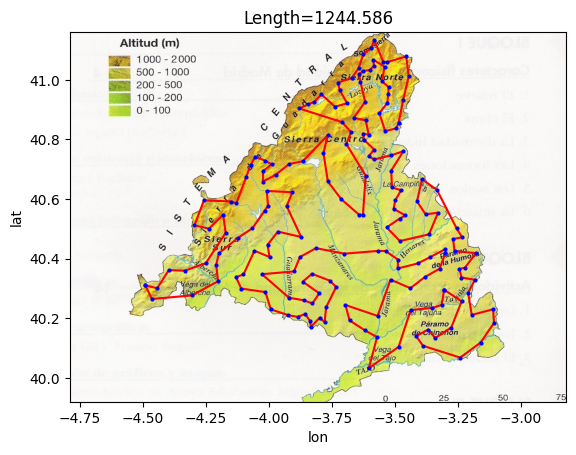

In [29]:
sol_tw = two_operator(sol2)

cambio = 1

n_cruces = 0
while cambio > 0:
    cambio = globaldist(sol_tw) - globaldist(two_operator(sol_tw))
    sol_tw = two_operator(sol_tw)
    n_cruces += 1
    
    
draw(sol_tw)
print(f"Se han desecho {n_cruces} cruces")

Para finalizar hemos implementado el temple simulado.

In [33]:
import random

def perturbate_tsp (state, N=1): # la perturbación tiene que ser diferente a los movimientos   
    
    state = state[:]
    
    for _ in range(N):
        p1, p2 = choices(range(len(state)), k = 2)
        state = swap(p1, p2, state)
        
    return state

def temple (state, fn, fnh, operador, best_improvement=False, epsilon=0.5, descenso=0.999):
    '''Búsqueda local
    state: solución de partida (aleatoria o utilizando un método constructivo).
    fn: función de evaluación (a minimizar).
    fnh: función de creación del entorno de vecindad.
    best_improvement: si usa estategia first_improvement o best_improvement
    '''
    
    improvement = True
    solucion_parcial = state
    
    while improvement:
        vecinos = fnh(solucion_parcial, operador)
        
        epsilon = descenso * epsilon
        if random.random() < epsilon:
            solucion_parcial = perturbate_tsp(solucion_parcial)
            continue
        elif best_improvement:
            posible_sol = min(vecinos, key=fn)
            
            if fn(posible_sol) < fn(solucion_parcial):
                solucion_parcial = posible_sol
            else:
                improvement = False
                
        else:
            
            improvement = False
            
            for vecino in vecinos:
                if fn(vecino) < fn(solucion_parcial):
                    solucion_parcial = vecino
                    improvement = True
                    break
            
            
        print(fn(solucion_parcial))
            
    return solucion_parcial

In [34]:
sol_temple = temple(cities, globaldist, vecindad, swap)

11007.943245688106
10888.7550422978
10850.668917338959
10850.302699743845
10848.638823370895
10808.63191286009
10791.697401619114
10790.255343858416
10782.934585093726
10659.608033184779
10653.975954964006
10530.983938508512
10370.85813570324
10370.333729464151
10520.883924776683
10516.306315261352
10505.752590996117
10475.388247101278
10424.211332165049
10387.12259849907
10303.45866463723
10221.257737941112
10316.995293131813
10308.374206771101
10306.353022678415
10302.141244361776
10298.760432153516
10415.893933679798
10405.713422234194
10374.606314615185
10383.125268393514
10374.61805739446
10359.60219700755
10341.936237151656
10383.09939606693
10370.441693001489
10124.794011428066
10156.178455172087
10149.333634269513
10112.917707231214
10067.405914771565
10058.208598206764
10104.035255980696
10092.582156032491
10086.663334354438
10067.447790601422
10053.67563877978
9971.013677451232
9909.66762878851
9902.920355393111
9888.265303879456
9856.875882520606
9802.361464018377
9965.98643

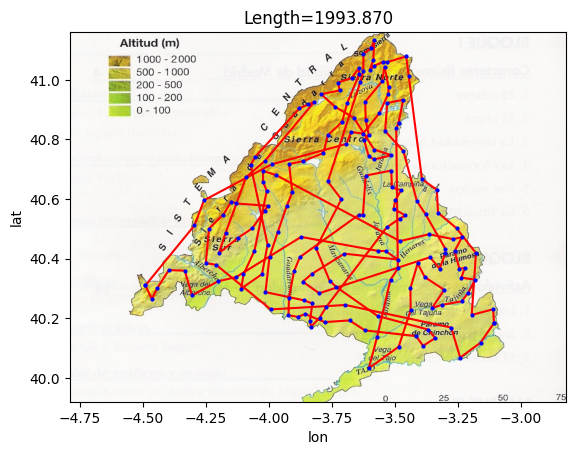

In [35]:
draw(sol_temple)

Y ahora combinando ambas tecnicas llegamos al siguiente resultado.

Se han desecho 68 cruces


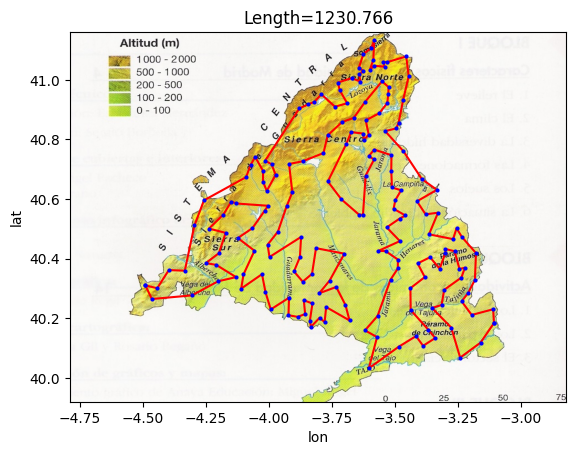

In [48]:
sol_tw = two_operator(sol_temple)

cambio = 1

n_cruces = 0
while cambio > 0:
    cambio = globaldist(sol_tw) - globaldist(two_operator(sol_tw))
    sol_tw = two_operator(sol_tw)
    n_cruces += 1

draw(sol_tw)
print(f"Se han desecho {n_cruces} cruces")